In [1]:
from my_library.algorithms.gmm import gmm

In [2]:
gm = gmm.GMM('cvs_hcb_member_profiling_preprocessed.csv')

In [3]:
gm.get_shape()

(10000, 55)

In [4]:
a, b, c = gm.randomizedSearchCV_gmm(
    {'n_components': list(range(2,11)), 'covariance_type': ['full', 'tied', 'diag', 'spherical'],
     'init_params': ['kmeans', 'random']}, cv=5, n_iter=10, rand_sample_prop=0.2)

In [6]:
n_components = b['n_components']
covariance_type = b['covariance_type']
init_params = b['init_params']

In [7]:
gm.get_training_history(c)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_components,param_init_params,param_covariance_type,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.078823,0.062895,0.084800,0.033860,4,kmeans,diag,"{'n_components': 4, 'init_params': 'kmeans', '...",-0.084902,0.371233,-0.174025,0.075388,0.102515,0.058042,0.186898,7
1,0.033906,0.015475,0.028209,0.014713,6,random,tied,"{'n_components': 6, 'init_params': 'random', '...",-0.140680,-0.172091,-0.111516,-0.179449,-0.124922,-0.145732,0.026309,9
2,0.022802,0.003511,0.019352,0.001755,3,random,tied,"{'n_components': 3, 'init_params': 'random', '...",-0.041269,-0.024487,-0.043210,-0.040530,-0.047697,-0.039439,0.007880,8
3,0.074000,0.017652,0.040712,0.011640,8,kmeans,spherical,"{'n_components': 8, 'init_params': 'kmeans', '...",0.532511,0.555317,0.564693,0.543434,0.559943,0.551180,0.011705,2
4,0.444560,0.182768,0.115273,0.035435,8,kmeans,full,"{'n_components': 8, 'init_params': 'kmeans', '...",0.510313,0.523597,0.505457,0.513936,0.554062,0.521473,0.017346,3
5,0.045708,0.007189,0.027014,0.002554,4,kmeans,spherical,"{'n_components': 4, 'init_params': 'kmeans', '...",0.586425,0.580169,0.584910,0.584713,0.585959,0.584435,0.002227,1
6,0.579929,0.221722,0.265173,0.156732,8,kmeans,tied,"{'n_components': 8, 'init_params': 'kmeans', '...",0.406113,0.273384,0.494909,0.324901,0.233066,0.346475,0.094084,6
7,0.210483,0.079952,0.044755,0.012439,8,random,spherical,"{'n_components': 8, 'init_params': 'random', '...",0.485643,0.466158,0.427672,0.518142,0.492396,0.478002,0.030167,5
8,0.220819,0.082562,0.032481,0.008568,7,random,spherical,"{'n_components': 7, 'init_params': 'random', '...",0.491686,0.520472,0.484808,0.454035,0.502720,0.490744,0.021959,4
9,0.046792,0.015144,0.027912,0.006373,6,random,diag,"{'n_components': 6, 'init_params': 'random', '...",-0.163010,-0.133666,-0.147383,-0.404545,-0.029361,-0.175593,0.123705,10


In [8]:
print('recommended parameters:', n_components, covariance_type, init_params)

recommended parameters: 4 spherical kmeans


In [10]:
clusters = gm.gmm(n_components, covariance_type, init_params)

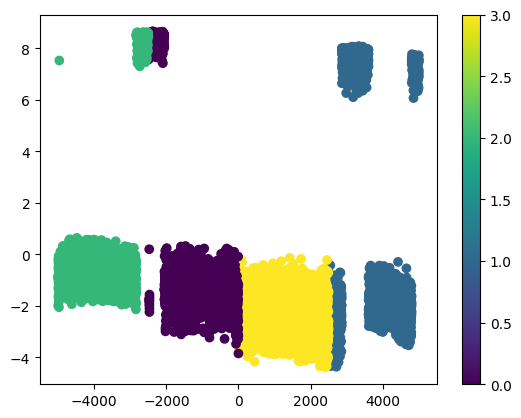

In [12]:
gm.scatter_plot(gm.pca(clusters))

In [13]:
gm.get_davies_bouldin_score(clusters)

0.5000867391678108

In [14]:
gm.get_silhouette_score(clusters)

0.5716871895776184

In [16]:
gm.get_cluster_centers(clusters)

,Unnamed: 0,spclty_visit_cnt_processed,ucc_mcable_visit_count_processed,srv_copay_amt_processed,aetna_num_children_modif_processed,strat_score_value_processed,ucc_visit_cnt_processed,first_pulse_processed,pcp_visit_cnt_processed,age_nbr_processed,op_rehab_visit_cnt_processed,final_future_tenure_processed,hosop_lab_visit_cnt_processed,income_processed,hosop_rad_visit_cnt_processed,op_rehab_allowed_amt_processed,final_total_tenure_processed,medical_allowed_pmpm_processed,rx_mths_processed,complex_chronic_common_flag_processed,relationship_processed,active_medical_ind_ind,hyc_missing_ind,hyc_ind,a2020_rx_ind_ind,cvs_rx_inrange_ind_ind,marital_ind,ctd_missing_ind,dep_missing_ind,alg_missing_ind,active_dental_ind_ind,cvs_mc_inrange_ind_ind,a2020_medicare_ind_ind,high_pulse_missing_ind,high_pulse_ind,active_pharmacy_ind_ind,active_medicare_ind_ind,hyp_missing_ind,hyp_ind,cvs_hh_inrange_ind_ind,dia_missing_ind,a2020_dental_ind_ind,lbp_missing_ind,obe_missing_ind,anx_missing_ind,ngd_missing_ind,ngd_ind,pcp_flag_ind,gender_cd_ind,urbsubr_R,urbsubr_S,urbsubr_U,lob_CFI,lob_CSI,lob_ME,cluster
0,6250.5,-0.165060,0.049409,-0.142391,-0.325803,-0.320987,0.036022,-0.418340,-0.265883,0.053064,-0.219140,0.033418,-0.117057,-0.015264,-0.102942,-0.194057,-0.143809,-0.138941,-0.003591,0.454483,-0.338183,-0.030061,0.007548,-0.449286,-0.000195,-0.012770,0.404469,0.007548,0.007548,0.007548,-0.002456,0.010177,-0.140511,0.007548,-0.349352,-0.093645,-0.141209,0.007548,-0.469385,-0.013134,0.007548,-0.026589,0.007548,0.007548,0.007548,0.007548,-0.208525,0.405019,0.083699,-0.120261,-0.067655,0.185352,0.009853,0.107265,-0.141381,0
1,1250.5,0.093753,-0.020659,0.002544,-0.090307,0.341642,0.009933,0.313016,-0.023258,0.353248,-0.080161,-0.045948,0.047055,0.180211,0.081981,-0.127820,0.067370,0.096746,-0.128813,-0.624705,1.220644,0.066926,0.546702,-0.027339,-0.128979,0.447181,-0.238274,0.546702,0.546702,0.546702,0.005027,-0.223928,-0.263880,0.546702,0.270941,-0.160178,-0.225185,0.546702,-0.013646,0.287230,0.546702,-0.084347,0.546702,0.546702,0.546702,0.546702,0.005851,0.214654,-0.131563,-0.000862,0.035163,-0.031014,0.092973,0.145729,-0.263673,1
2,8749.5,-0.285781,0.078901,-0.228919,0.961950,-0.749698,0.067713,-0.585832,-0.092194,-1.253815,0.366315,-0.212146,-0.236653,-0.057778,-0.286990,0.453195,-0.105127,-0.197507,-0.128840,0.427360,-0.812471,0.041501,-0.101311,-0.488269,-0.130100,-0.099028,-0.323345,-0.101311,-0.101311,-0.101311,0.131167,0.103357,-0.426653,-0.101311,-0.242541,-0.212684,-0.398113,-0.101311,-0.504740,-0.124994,-0.101311,0.015730,-0.101311,-0.101311,-0.101311,-0.101311,-0.258905,-0.104684,0.033225,0.032396,0.039355,-0.069101,-0.002773,0.347236,-0.426490,2
3,3751.5,0.356881,-0.107596,0.368649,-0.546028,0.728513,-0.113647,0.690572,0.381141,0.847263,-0.067126,0.224739,0.306524,-0.107326,0.307803,-0.131372,0.181397,0.239514,0.261344,-0.256275,-0.071237,-0.078444,-0.453371,0.964556,0.259377,-0.335751,0.157664,-0.453371,-0.453371,-0.453371,-0.133744,0.110582,0.831143,-0.453371,0.320456,0.466561,0.764575,-0.453371,0.987407,-0.149343,-0.453371,0.095252,-0.453371,-0.453371,-0.453371,-0.453371,0.461408,-0.514837,0.014811,0.088632,-0.006945,-0.085064,-0.100120,-0.600261,0.831641,3


In [17]:
gm.get_cluster_sizes(clusters)

0    2498
1    2502
2    2500
3    2500
dtype: int64